In [1]:
import neurokit2 as nk
import pywt
import scipy
from tqdm import tqdm
from scipy import signal
import scipy.signal
from scipy.signal import butter, iirnotch, lfilter, find_peaks, peak_prominences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hampel import hampel

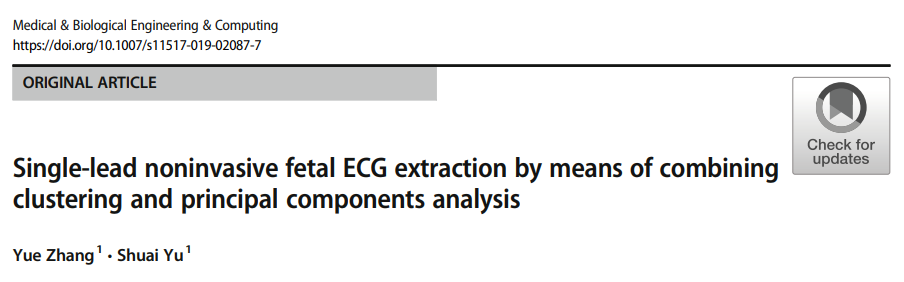

In [2]:
ecg_wave = np.load('/smc_work/datanvme/smc/origin/2015_0428_19429031_20150428011937_BS2111_001.npy')[:,1]

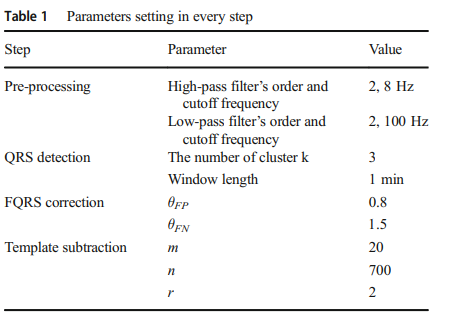

In [4]:
def bandpass(lowcut, highcut, order=2):
    nyq = 0.5 * 500
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [5]:
def filter_wave(ecg_wave):
    b , a = bandpass(8, 100) # Lower : 0.5Hz , Upper : 45Hz
    filtered_ecg = signal.filtfilt(b,a,ecg_wave, method="gust")
    return filtered_ecg

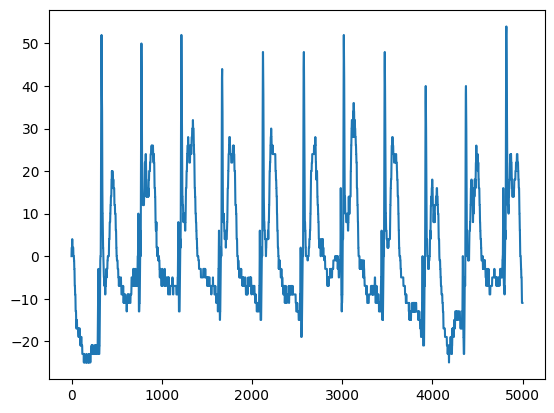

In [3]:
plt.plot(ecg_wave)
plt.show()

In [6]:
filtered_ecg = filter_wave(ecg_wave)

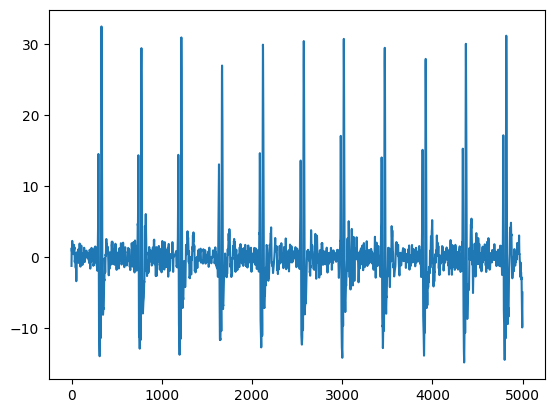

In [7]:
plt.plot(filtered_ecg)
plt.show()

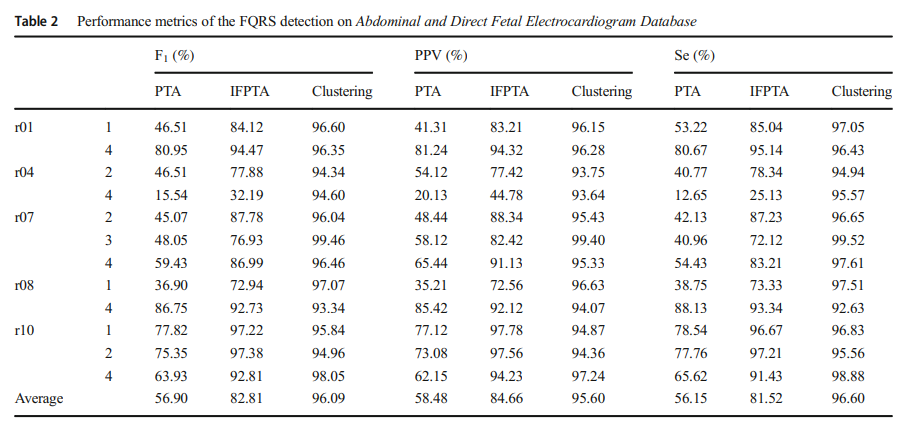

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [60]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=15)

In [82]:
k_means.fit(ecg_wave.reshape(-1,1))

KMeans(n_clusters=4, n_init=15)

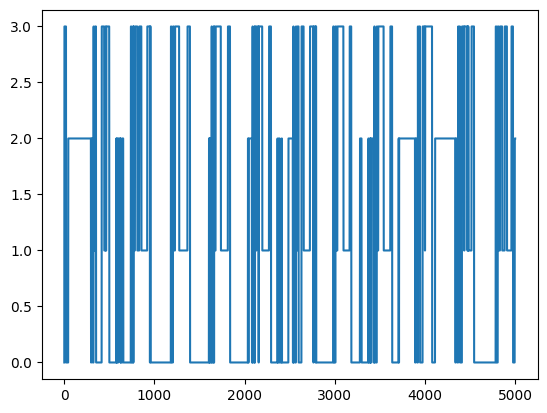

In [83]:
k_means_labels = k_means.labels_
k_means_labels
plt.plot(k_means_labels)
plt.show()

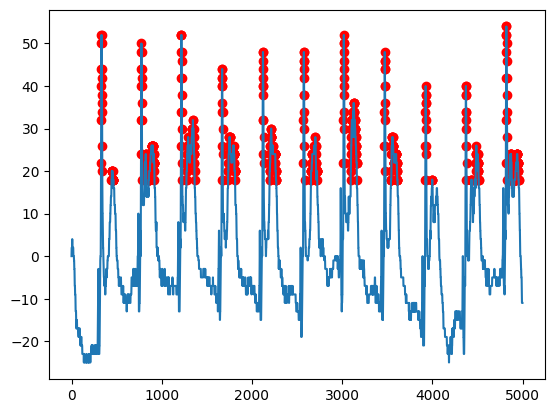

In [89]:
t = np.where(k_means_labels==1)[0]
plt.plot(ecg_wave)
plt.scatter(t,ecg_wave[t],color = 'red')
plt.show()

In [63]:

k_means.fit(filtered_ecg.reshape(-1,1))

KMeans(n_clusters=4, n_init=15)

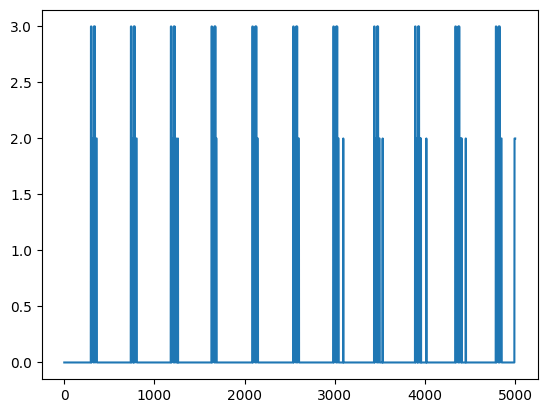

In [64]:
k_means_labels = k_means.labels_
k_means_labels


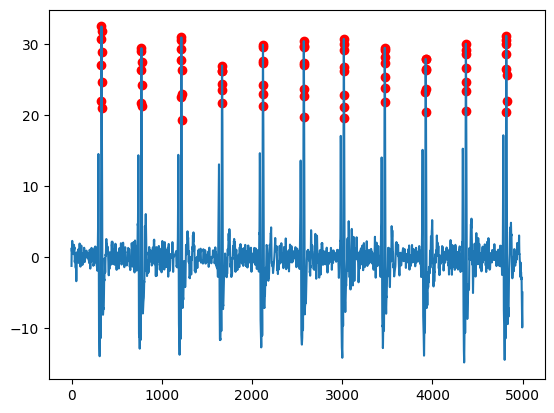

In [81]:
t = np.where(k_means_labels==1)[0]
plt.plot(filtered_ecg)
plt.scatter(t,filtered_ecg[t],color = 'red')
plt.show()

In [8]:
def k_means(data, num_clus=3, steps=200):

    # Convert data to Numpy array
    cluster_data = np.array(data)

    # Initialize by randomly selecting points in the data
    center_init = np.random.randint(0, cluster_data.shape[0], num_clus)

    # Create a list with center coordinates
    center_init = cluster_data[center_init, :]

    # Repeat clustering  x times
    for _ in range(steps):

        # Calculate distance of each data point to cluster center
        distance = []
        for center in center_init:
            tmp_distance = np.sqrt(np.sum((cluster_data - center)**2, axis=1))

            # Adding smalle random noise to the data to avoid matching distances to centroids
            tmp_distance = tmp_distance + np.abs(np.random.randn(len(tmp_distance))*0.0001)
            distance.append(tmp_distance)

        # Assign each point to cluster based on minimum distance
        _, cluster = np.where(np.transpose(distance == np.min(distance, axis=0)))

        # Find center of mass for each cluster
        center_init = []
        for i in range(num_clus):    
            center_init.append(cluster_data[cluster == i, :].mean(axis=0).tolist())

    return cluster, center_init, distance

### 2. Phase Transform (P-Peak)

### 3. Self - Organized - Operational Neural Network